In [28]:
# import stuff
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import Function
from sympy.solvers import solve
import sympy as sp

# make 6 t-vars to establish variable bounds
t1 = sp.symbols('t_1', nonnegative=True)
t2 = sp.symbols('t_2', nonnegative=True)
t3 = sp.symbols('t_3', nonnegative=True)
t4 = sp.symbols('t_4', nonnegative=True)
t5 = sp.symbols('t_5', nonnegative=True)
t6 = sp.symbols('t_6', nonnegative=True)

# define the maximization variables
X1, X2, X3, X4, LC, LA, s, u = sp.var('X_1, X_2, X_3, X_4, L_C, L_A, s, u', positive=True);

s = t1/(1+t1)
u = t1/()

# import exogenous variables
a1, a2, a3, a4 = sp.symbols('alpha_1, alpha_2, alpha_3, alpha_4') # alphas (each 0<=a<=1, and must add up to one)

S1, S2, S3, S4 = sp.symbols('S_1, S_2, S_3, S_4', positive=True) # Subsistence levels

t = sp.symbols('t', nonnegative=True)
v0 = sp.symbols('v_0')
v0 = t/(1+t) # raw skill level 0<=v0<=1

i = sp.symbols('\hat{\imath}') # children in the household - time endowment
I = sp.symbols('I') # household size and total time endowment

p1,p2,p3,p4 = sp.symbols('p_1, p_2, p_3, p_4', positive=True) # consumer prices


climate = sp.symbols('theta') # climate variable
capital = sp.symbols('K') # quasi fixed land and (non-human) capital

lam = sp.symbols('\lambda') # shadow price (lagrange multiplier)

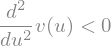

In [12]:
# technology of skill enhancement
v = Function('v')(u)
v.diff(u,1)>0
v.diff(u,2)<0

In [13]:
# labour equivalence function (cases 1 and 2)
L1 = LA-s * u * LC + s * v * LC + (1 - s) * v0 * LC
L2 = v * (LA/u)+v0*(LC-LA/u)

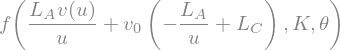

In [20]:
# define production function
f1 = Function('f')(L1, capital,climate)
#f1.diff(L1,1)>0
f1.diff(climate)>0
#f1.diff(L1,2)<0
#f1.diff(L1, climate)<0
f2 = Function('f')(L2,capital, climate)
display(f2)

In [26]:
# utility function (cases 1 and 2)
U1 = (i-LC) * (X1-S1)**a1 *(X2-S2)**a2 * (I-i-LA-S3)**a3 * (i-LC-S4)**a4 
U2 =          (X1-S1)**a1 *(X2-S2)**a2 * (I-i-LA-S3)**a3 * (i-LC-S4)**a4


In [27]:
# main constraints
G1 = p1*X1 + p2*X2 + p3*I - p3*i -p3*LA + p4*i - p4*LC - p1*f1 + p3*LA + p4*LC - p3*I-p3*i - p4(i)
G2 = p1*X1 + p2*X2 + p3*I - p3*i -p3*LA + p4*i - p4*LC - p1*f2 + p3*LA + p4*LC - p3*I-p3*i - p4(i)


TypeError: 'Symbol' object is not callable

In [48]:
# Lagrangians
Lagrange1 = U1 - lam * G1 # case 1
Lagrange2 = U2 - lam * G1 # case 2
Lagrange3 = U1 - lam * G2 # case 3
Lagrange4 = U2 - lam * G2 # case 4

In [50]:
# Calculate KKT-conditions
grad1 = [sp.diff(Lagrange1,c) for c in [X1, X2, X3, X4, LC, LA, s, u]] # gradient of Lagrangian w.r.t choice variables
KKT1 = grad1 + [G1]

grad2 = [sp.diff(Lagrange2,c) for c in [X1, X2, X3, X4, LC, LA, s, u]] # gradient of Lagrangian w.r.t choice variables
KKT2 = grad2 + [G1]

grad3 = [sp.diff(Lagrange3,c) for c in [X1, X2, X3, X4, LC, LA, s, u]] # gradient of Lagrangian w.r.t choice variables
KKT3 = grad3 + [G2]

grad4 = [sp.diff(Lagrange4,c) for c in [X1, X2, X3, X4, LC, LA, s, u]] # gradient of Lagrangian w.r.t choice variables
KKT4 = grad4 + [G2]

In [51]:

candidates = sp.solve(KKT1, [x1, x2, x3, x4, lc, la, s, u, lam], dict=True) # solve the KKT equations
print(candidates)

AttributeError: 'list' object has no attribute 'free_symbols'

In [ ]:
[f.subs(p) for p in candidates]